:::{canonical-tutorial} tutorials/trajectories/paga-paul15
:::

# Trajectory inference for hematopoiesis in mouse

:::{seealso}
More examples for trajectory inference on complex datasets can be found in the
[PAGA][] repository {cite:p}`Wolf2019`, for instance, multi-resolution analyses of whole animals,
such as for [planaria][] for data of {cite:t}`Plass2018`.

[PAGA]: https://github.com/theislab/paga
[planaria]: https://nbviewer.jupyter.org/github/theislab/paga/blob/master/planaria/planaria.ipynb


```{image} /_static/img/tutorials/paga_planaria.png
:width: 350px
:align: center
```
:::

Reconstructing myeloid and erythroid differentiation for data of [Paul et al. (2015)](http://doi.org/10.1016/j.cell.2015.11.013).

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import scanpy as sc

In [52]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
results_file = "./data/moignard15.h5ad"
# low dpi (dots per inch) yields small inline figures
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor="white")

-----
anndata     0.10.8
scanpy      1.10.2
-----
PIL                 10.3.0
asttokens           NA
colorama            0.4.6
comm                0.2.2
cycler              0.12.1
cython_runtime      NA
dateutil            2.9.0.post0
debugpy             1.8.2
decorator           5.1.1
exceptiongroup      1.2.1
executing           2.0.1
fontTools           4.53.0
h5py                3.11.0
igraph              0.11.6
importlib_resources NA
ipykernel           6.29.4
ipywidgets          8.1.3
jedi                0.19.1
joblib              1.4.2
kiwisolver          1.4.5
legacy_api_wrap     NA
llvmlite            0.43.0
louvain             0.8.2
lxml                5.2.2
matplotlib          3.9.0
matplotlib_inline   0.1.7
mpl_toolkits        NA
natsort             8.4.0
networkx            3.2.1
nt                  NA
numba               0.60.0
numpy               1.26.4
packaging           24.1
pandas              2.2.2
parso               0.8.4
patsy               0.5.6
pkg_resources    

In [54]:
!pip install openpyxl

In [92]:
adata = sc.datasets.moignard15()

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


c:\Users\user\Documents\GitHub\PathSingle\venv\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [99]:
adata

AnnData object with n_obs × n_vars = 3592 × 29
    obs: 'exp_groups', 'n_genes'
    var: 'n_cells'
    uns: 'iroot', 'exp_groups_colors'

In [105]:
adata.obs_names

Index(['HFA1_001', 'HFA1_002', 'HFA1_003', 'HFA1_004', 'HFA1_005', 'HFA1_007',
       'HFA1_008', 'HFA1_009', 'HFA1_010', 'HFA1_011',
       ...
       '4SFGA6_238', '4SFGA6_239', '4SFGA6_240', '4SFGA6_241', '4SFGA6_242',
       '4SFGA6_243', '4SFGA6_244', '4SFGA6_245', '4SFGA6_246', '4SFGA6_247'],
      dtype='object', length=3592)

Let us work with a higher precision than the default 'float32' to ensure _exactly_ the same results across different computational platforms.

In [57]:
# this is not required and results will be comparable without it
#adata.X = adata.X.astype("float64")

## Preprocessing and Visualization

Apply a simple [preprocessing recipe](https://scanpy.readthedocs.io/en/latest/api/scanpy.api.pp.recipe_zheng17.html).

In [84]:
print(adata.X.shape)
print(adata.X[:5, :5])

(3934, 42)
[[-2.598855758 -14.0 1.815101273 -0.096168027 -4.038593128]
 [-14.0 -14.0 -14.0 -3.913417315 -14.0]
 [-14.0 -14.0 -14.0 -4.460141888 -14.0]
 [-14.0 -14.0 -14.0 -14.0 -14.0]
 [-3.907257698 -14.0 0.019497022 -0.715845207 -2.546303348]]


In [ ]:
#sc.pp.recipe_zheng17(adata)

normalizing counts per cell
    finished (0:00:00)


c:\Users\user\Documents\GitHub\PathSingle\venv\lib\site-packages\scanpy\preprocessing\_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


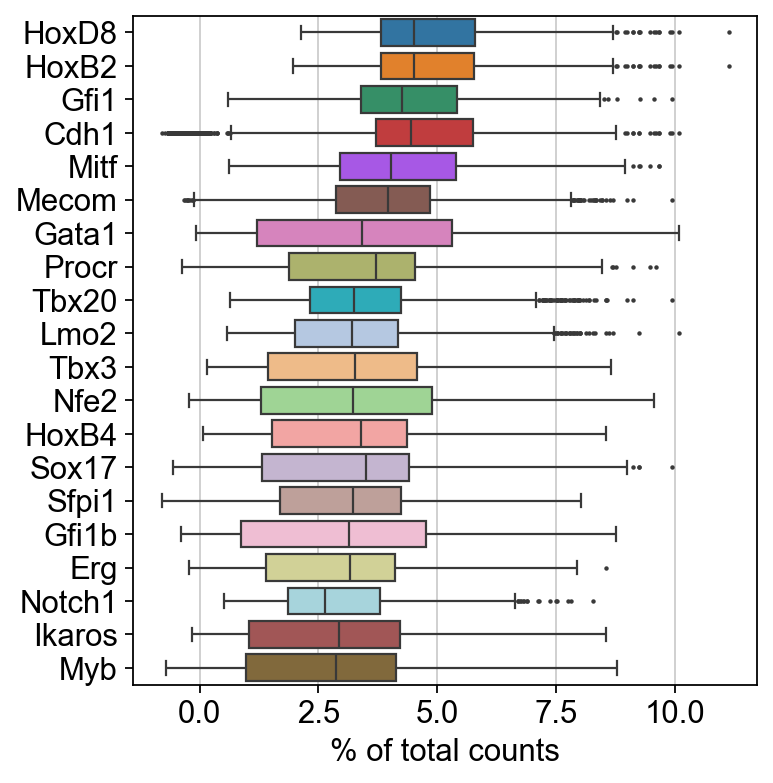

In [93]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [97]:
sc.pp.filter_cells(adata, min_genes=2)
sc.pp.filter_genes(adata, min_cells=2)

In [95]:
adata

AnnData object with n_obs × n_vars = 3592 × 29
    obs: 'exp_groups', 'n_genes'
    var: 'n_cells'
    uns: 'iroot', 'exp_groups_colors'

In [106]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.scale(adata)
adata.raw = adata

normalizing counts per cell


    finished (0:00:00)


c:\Users\user\Documents\GitHub\PathSingle\venv\lib\site-packages\scanpy\preprocessing\_simple.py:384: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)


In [7]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["exp_groups"], frameon=False, ncols=2)

computing PCA
    with n_comps=50
    finished (0:00:00)


In [10]:
!pip install igraph

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.0 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 7.8 MB/s eta 0:00:00


In [11]:
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)
sc.tl.draw_graph(adata)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fr', graph_drawing coordinates (adata.obsm) (0:00:06)


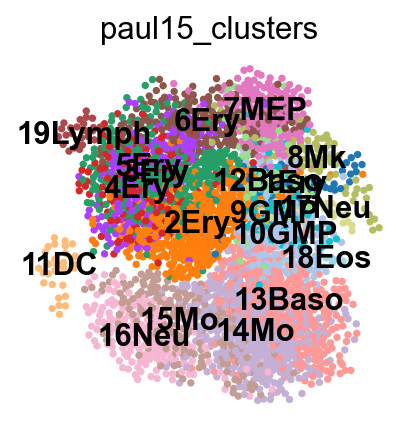

In [12]:
sc.pl.draw_graph(adata, color="paul15_clusters", legend_loc="on data")

This looks pretty messy.

## Optional: Denoising the graph

To denoise the graph, we represent it in diffusion map space (and not in PCA space). Computing distances within a few diffusion components amounts to denoising the graph - we just take a few of the first spectral components. It's very similar to denoising a data matrix using PCA. The approach has been used in a couple of papers, see e.g. [Schiebinger et al. (2017)](https://doi.org/10.1101/191056) or [Tabaka et al. (2018)](https://doi.org/10.1101/512582). It's also related to the principles behind MAGIC [Dijk et al. (2018)](https://doi.org/10.1016/j.cell.2018.05.061).

:::{note}
This is *not* a necessary step, neither for PAGA, nor clustering, nor pseudotime estimation. You might just as well go ahead with a non-denoised graph. In many situations (also here), this will give you very decent results.
:::

In [13]:
sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=10, use_rep="X_diffmap")

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         1.         0.9989278  0.99671    0.99430376 0.98939794
     0.9883687  0.98731077 0.98398703 0.983007   0.9790806  0.9762548
     0.9744365  0.9729161  0.9652972 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [14]:
sc.tl.draw_graph(adata)

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fr', graph_drawing coordinates (adata.obsm) (0:00:05)


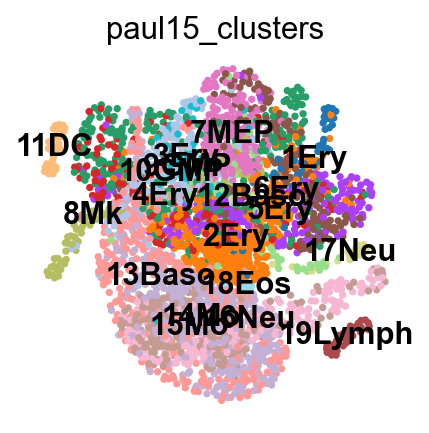

In [15]:
sc.pl.draw_graph(adata, color="paul15_clusters", legend_loc="on data")

This still looks messy, but in a different way: a lot of the branches are overplotted.

## Clustering and PAGA

:::{note}
Note that today, we'd use `sc.tl.leiden` - here, we use `sc.tl.louvain` the sake of reproducing the paper results.
:::

In [17]:
!pip install louvain

In [18]:
sc.tl.louvain(adata, resolution=1.0)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 25 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


Annotate the clusters using marker genes.

| cell type | marker |
| --- | --- |
|HSCs | Procr |
|Erythroids | Gata1, Klf1, Epor, Gypa, Hba-a2, Hba-a1, Spi1 |
|Neutrophils | Elane, Cebpe, Ctsg, Mpo, Gfi1 |
|Monocytes | Irf8, Csf1r, Ctsg, Mpo |
|Megakaryocytes | Itga2b (encodes protein CD41), Pbx1, Sdpr, Vwf |
|Basophils | Mcpt8, Prss34 |
|B cells | Cd19, Vpreb2, Cd79a |
|Mast cells| Cma1, Gzmb, CD117/C-Kit |
|Mast cells & Basophils| Ms4a2, Fcer1a, Cpa3, CD203c (human)|

For simple, coarse-grained visualization, compute the PAGA graph, a coarse-grained and simplified (abstracted) graph. Non-significant edges in the coarse- grained graph are thresholded away.

In [19]:
sc.tl.paga(adata, groups="louvain")

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


--> added 'pos', the PAGA positions (adata.uns['paga'])


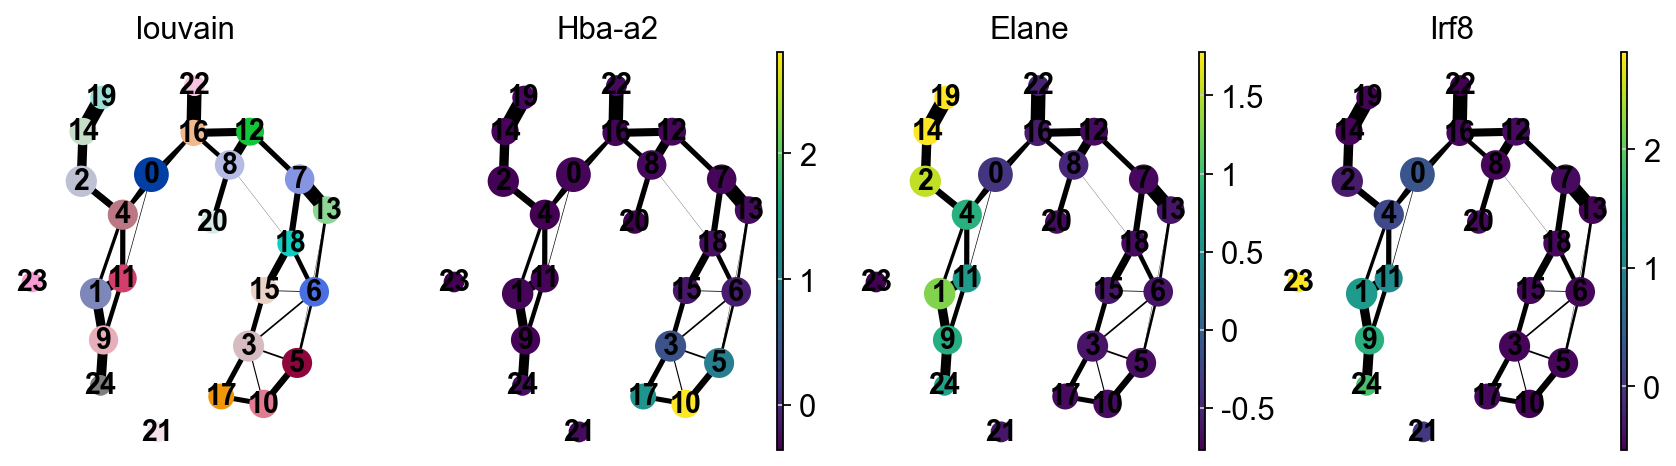

In [20]:
sc.pl.paga(adata, color=["louvain", "Hba-a2", "Elane", "Irf8"])

--> added 'pos', the PAGA positions (adata.uns['paga'])


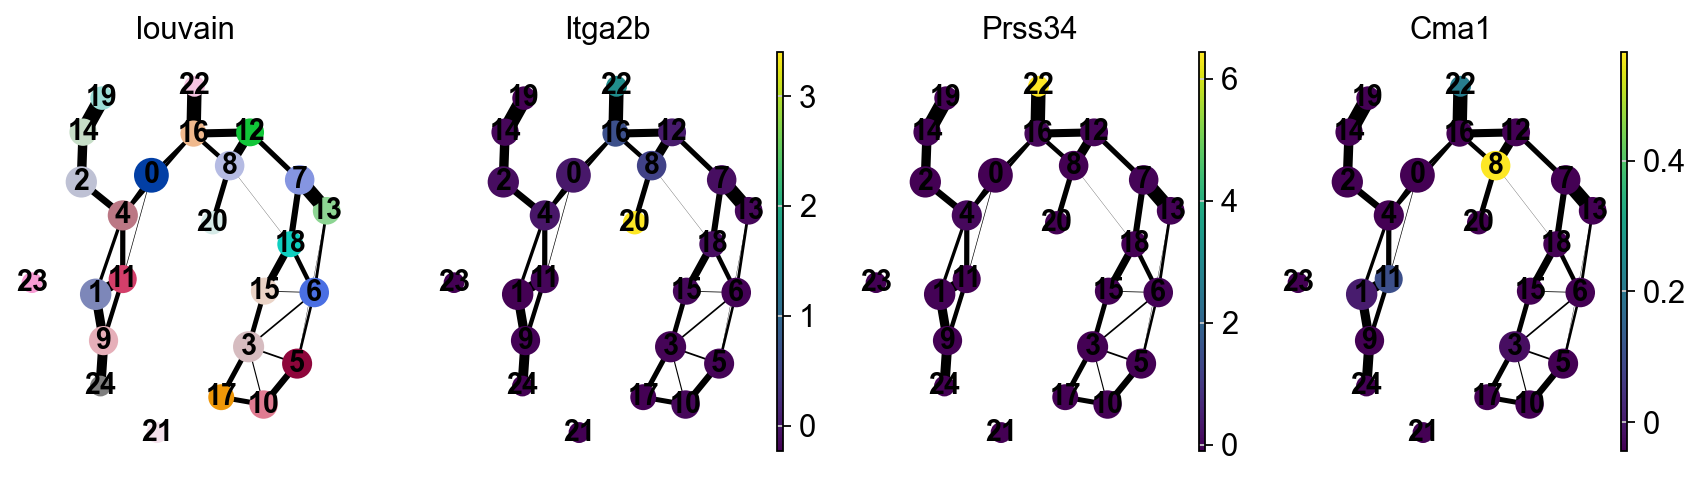

In [21]:
sc.pl.paga(adata, color=["louvain", "Itga2b", "Prss34", "Cma1"])

Actually annotate the clusters --- note that *Cma1* is a Mast cell marker and only appears in a small fraction of the cells in the progenitor/stem cell cluster 8, see the single-cell resolved plot below.

In [22]:
adata.obs["louvain"].cat.categories

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'],
      dtype='object')

In [23]:
adata.obs["louvain_anno"] = adata.obs["louvain"]

In [19]:
adata.obs["louvain_anno"].cat.categories = [
    *["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"],
    *["10/Ery", "11", "12", "13", "14", "15"],
    *["16/Stem", "17", "18"],
    *[
        "19/Neu",
        "20/Mk",
        "21",
    ],
    *["22/Baso", "23", "24/Mo"],
]

Let's use the annotated clusters for PAGA.

In [24]:
sc.tl.paga(adata, groups="louvain_anno")

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


--> added 'pos', the PAGA positions (adata.uns['paga'])


<Axes: >

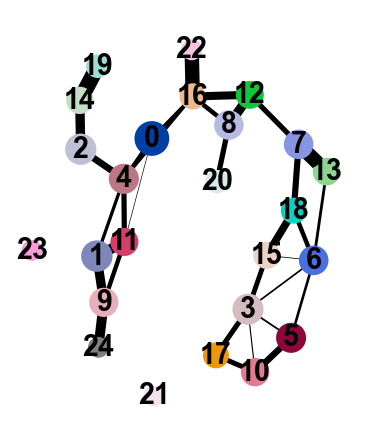

In [25]:
sc.pl.paga(adata, threshold=0.03, show=False)

## Recomputing the embedding using PAGA-initialization

The following is just as well possible for a UMAP.

In [26]:
sc.tl.draw_graph(adata, init_pos="paga")

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fr', graph_drawing coordinates (adata.obsm) (0:00:02)


Now we can see all marker genes also at single-cell resolution in a meaningful layout.

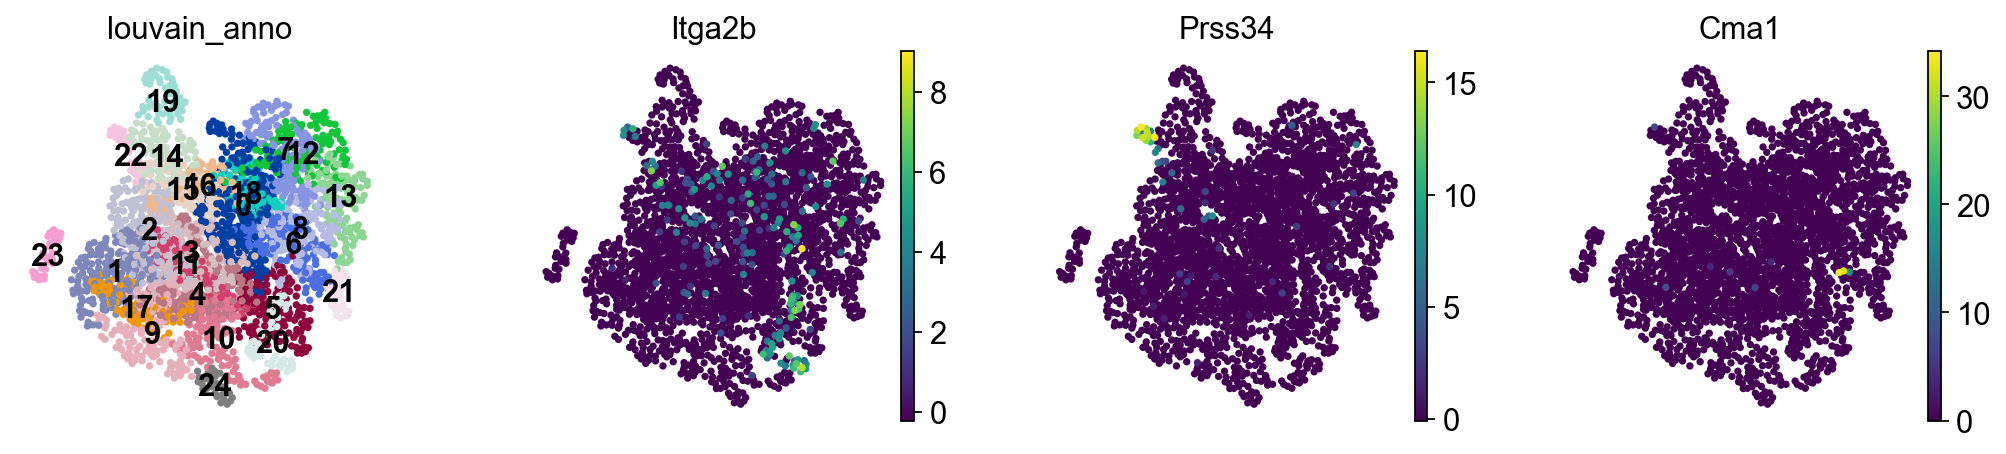

In [27]:
sc.pl.draw_graph(
    adata, color=["louvain_anno", "Itga2b", "Prss34", "Cma1"], legend_loc="on data"
)

Choose the colors of the clusters a bit more consistently.

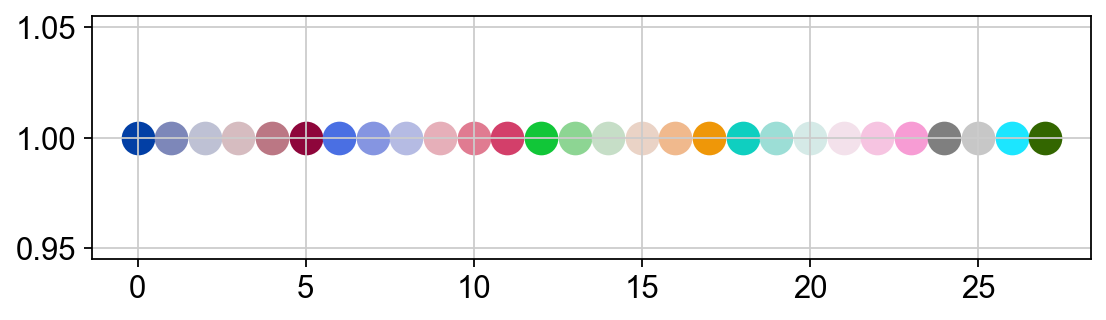

In [28]:
pl.figure(figsize=(8, 2))
for i in range(28):
    pl.scatter(i, 1, c=sc.pl.palettes.zeileis_28[i], s=200)
pl.show()

In [29]:
zeileis_colors = np.array(sc.pl.palettes.zeileis_28)
new_colors = np.array(adata.uns["louvain_anno_colors"])

In [30]:
new_colors[[16]] = zeileis_colors[[12]]  # Stem colors / green
new_colors[[10, 17, 5, 3, 15, 6, 18, 13, 7, 12]] = zeileis_colors[  # Ery colors / red
    [5, 5, 5, 5, 11, 11, 10, 9, 21, 21]
]
new_colors[[20, 8]] = zeileis_colors[[17, 16]]  # Mk early Ery colors / yellow
new_colors[[4, 0]] = zeileis_colors[[2, 8]]  # lymph progenitors / grey
new_colors[[22]] = zeileis_colors[[18]]  # Baso / turquoise
new_colors[[19, 14, 2]] = zeileis_colors[[6, 6, 6]]  # Neu / light blue
new_colors[[24, 9, 1, 11]] = zeileis_colors[[0, 0, 0, 0]]  # Mo / dark blue
new_colors[[21, 23]] = zeileis_colors[[25, 25]]  # outliers / grey

In [31]:
adata.uns["louvain_anno_colors"] = new_colors

And add some white space to some cluster names. The layout shown here differs from the one in the paper, which can be found [here](https://github.com/theislab/paga/blob/f53fcdf4a861b7d3410f8096ffc13a07f1d225c0/blood/paul15/paul15.ipynb). These differences, however, are only cosmetic. We had to change the layout as we moved from a randomized PCA and float32 to float64 precision.

--> added 'pos', the PAGA positions (adata.uns['paga'])


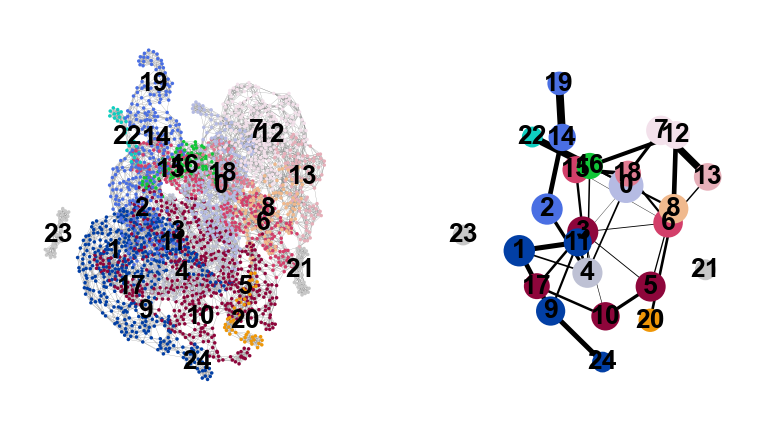

[<Axes: xlabel='FR1', ylabel='FR2'>, <Axes: >]

In [32]:
sc.pl.paga_compare(
    adata,
    threshold=0.03,
    title="",
    right_margin=0.2,
    size=10,
    edge_width_scale=0.5,
    legend_fontsize=12,
    fontsize=12,
    frameon=False,
    edges=True,
    save=True,
)

## Reconstructing gene changes along PAGA paths for a given set of genes

Choose a root cell for diffusion pseudotime.

In [38]:
adata.uns["iroot"] = np.flatnonzero(adata.obs["louvain_anno"] == "16")[0] # 16/Stem

In [39]:
sc.tl.dpt(adata)

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


Select some of the marker gene names.

In [40]:
gene_names = [
    *["Gata2", "Gata1", "Klf1", "Epor", "Hba-a2"],  # erythroid
    *["Elane", "Cebpe", "Gfi1"],  # neutrophil
    *["Irf8", "Csf1r", "Ctsg"],  # monocyte
]

Use the full raw data for visualization.

In [41]:
adata_raw = sc.datasets.paul15()
sc.pp.log1p(adata_raw)
sc.pp.scale(adata_raw)
adata.raw = adata_raw

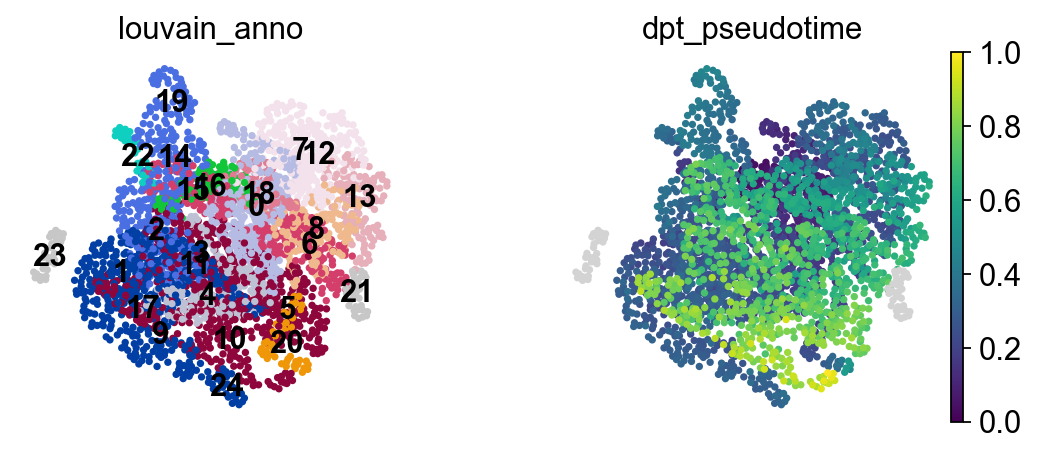

In [42]:
sc.pl.draw_graph(adata, color=["louvain_anno", "dpt_pseudotime"], legend_loc="on data")

In [43]:
paths = [
    ("erythrocytes", [16, 12, 7, 13, 18, 6, 5, 10]),
    ("neutrophils", [16, 0, 4, 2, 14, 19]),
    ("monocytes", [16, 0, 4, 11, 1, 9, 24]),
]

In [44]:
adata.obs["distance"] = adata.obs["dpt_pseudotime"]

In [45]:
adata.obs["clusters"] = adata.obs["louvain_anno"]  # just a cosmetic change

In [46]:
adata.uns["clusters_colors"] = adata.uns["louvain_anno_colors"]

In [ ]:
_, axs = pl.subplots(
    ncols=3, figsize=(6, 2.5), gridspec_kw={"wspace": 0.05, "left": 0.12}
)
pl.subplots_adjust(left=0.05, right=0.98, top=0.82, bottom=0.2)
for ipath, (descr, path) in enumerate(paths):
    _, data = sc.pl.paga_path(
        adata,
        path,
        gene_names,
        show_node_names=False,
        ax=axs[ipath],
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        annotations=["distance"],
        show_yticks=True if ipath == 0 else False,
        show_colorbar=False,
        color_map="Greys",
        groups_key="clusters",
        color_maps_annotations={"distance": "viridis"},
        title="{} path".format(descr),
        return_data=True,
        show=False,
    )
    data.to_csv("./data/paga_path_{}.csv".format(descr))
pl.savefig("./figures/paga_path_paul15.pdf")
pl.show()

In [51]:
adata.obs['louvain']

W31105     8
W31106     1
W31107    17
W31108     2
W31109    17
          ..
W39164     6
W39165    24
W39166     8
W39167     2
W39168     3
Name: louvain, Length: 2730, dtype: category
Categories (25, object): ['0', '1', '2', '3', ..., '21', '22', '23', '24']